# CS7641 Machine Learning

### Assignment 1 - Supervised Learning
### Author: Vivek Agrawal

This file will provide analysis of 5 different machine learning algorithms for 2 different datasets.

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors

### References
* https://medium.com/thalus-ai/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b
* https://becominghuman.ai/understand-classification-performance-metrics-cad56f2da3aa
* https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
* https://www.dataquest.io/blog/learning-curves-machine-learning/



## 1. Data Sets Used
First step in the process is to load all the datasets
1. https://archive.ics.uci.edu/ml/datasets/Census+Income
1. https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, scale, KBinsDiscretizer


def gtid():
    return 903471711

def author(self):
    return 'vagrawal63'	

  
def get_wine_data(file_name = "winequality.csv"):
    data = pd.read_csv(file_name)

    
    #convert class which is Y in this case to binary classes
    def func(x):
        if(x > 6):
            return 1
        else:
            return 0
    data['quality'] = data['quality'].apply(func)
    
    result = data['quality']
    del data['quality']
    print("Original: " + str(data.shape))
    #one hot encoding with columns that have more than two values 
    #data = pd.get_dummies(data, columns=['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 
    #                                     'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 
    #                                     'alcohol'])
    
    #replace -1 with 1 for columns with -1 and 1
    #data.replace(to_replace = -1, value = 0, inplace = True)
    #print(data.head())
    # data = MinMaxScaler(data)
    #data = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile').fit(data).transform(data)
    # print(data1)
    data = scale(data)
    return data, result


#randomize using GT ID
np.random.seed(gtid())
#Read Data File
wine_data, result = get_wine_data()
print("Cleaned: " + str(wine_data.shape))
#print(wine_data)

Original: (5011, 12)
Cleaned: (5011, 12)


## 2. Plotting Methods
The sections below contain various plotting methods to be used throughout the assignment

In [69]:
from matplotlib import pyplot as plt

def plot_learning_curve(train_sizes, train_scores, validation_scores, title, xlabel = "Dataset Size"):

    plt.ylim((0.5, 1.05))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Accuracy")
    series1_mean = train_scores.mean(axis = 1)
    series1_std = train_scores.std(axis = 1)
    series2_mean = validation_scores.mean(axis = 1)
    series2_std = validation_scores.std(axis = 1)
    #plt.fill_between(train_sizes, series1_mean - 2*series1_std, series1_mean + 2*series1_std, alpha=0.2, color="b")
    plt.fill_between(train_sizes, series2_mean - 2*series2_std, series2_mean + 2*series2_std, alpha=0.2, color="g")
    plt.plot(train_sizes, series1_mean, 'o-', color='b', label = "Training Accuracy", lw=2)
    plt.plot(train_sizes, series2_mean, 'o-', color='g', label = "Cross-Validation Accuracy", lw=2)
    plt.legend(loc="best")
    plt.legend(loc=3)
    plt.grid(True, linestyle = "--")
    plt.show()
    
def plot_validation_curve(param_range, train_scores, test_scores, title, xlabel):
    plt.ylim((0.5, 1.05))
    train_scores_mean = train_scores.mean(axis = 1)
    train_scores_std = train_scores.std(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    test_scores_std = test_scores.std(axis = 1)
    
    hp = param_range[np.ndarray.argmax(test_scores_mean)]
    print(xlabel, hp)
    print("CV Accuracy: " , test_scores_mean[np.ndarray.argmax(test_scores_mean)])

    plt.title(title)
    plt.xlabel(xlabel+ " {Best value: " + str(hp) + "}")
    plt.ylabel("Accuracy")
    #plt.fill_between(param_range, train_scores_mean - 2*train_scores_std, train_scores_mean + 2*train_scores_std, alpha=0.2, color="b")
    plt.fill_between(param_range, test_scores_mean - 2*test_scores_std, test_scores_mean + 2*test_scores_std, alpha=0.2, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label = "Training Accuracy", lw=2)
    plt.plot(param_range, test_scores_mean, 'o-', color='g', label = "Cross-Validation Accuracy", lw=2)
    plt.legend(loc="best")
    plt.legend(loc=3)
    plt.grid(True, linestyle = "--")
    plt.show()
    return hp

def plot_validation_curve2(param_range, train_scores, test_scores, title, xlabel, visual = 0):
    plt.ylim((0.5, 1.05))
    train_scores_mean = train_scores.mean(axis = 1)
    train_scores_std = train_scores.std(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    test_scores_std = test_scores.std(axis = 1)
    
    #hp = param_range[np.ndarray.argmax(test_scores_mean)]
    hp = round(param_range[np.ndarray.argmin(np.abs(test_scores_mean - train_scores_mean))],2)
    if ((visual != 0) and (hp != visual)):
        hp = visual
    
    print(xlabel, hp)
    print("CV Accuracy: " , test_scores_mean[np.ndarray.argmax(test_scores_mean)])

    plt.title(title)
    plt.xlabel(xlabel+ " {Best value: " + str(hp) + "}")
    plt.ylabel("Accuracy")
    #plt.fill_between(param_range, train_scores_mean - 2*train_scores_std, train_scores_mean + 2*train_scores_std, alpha=0.2, color="b")
    #plt.fill_between(param_range, test_scores_mean - 2*test_scores_std, test_scores_mean + 2*test_scores_std, alpha=0.2, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label = "Training Accuracy", lw=2)
    plt.plot(param_range, test_scores_mean, 'o-', color='g', label = "Cross-Validation Accuracy", lw=2)
    plt.legend(loc="best")
    plt.legend(loc=3)
    plt.grid(True, linestyle = "--")
    plt.show()
    return hp

def plot_validation_curve3(param_range, train_scores, test_scores, title, xlabel):
    plt.ylim((0.6, 1.05))
    train_scores_mean = train_scores.mean(axis = 1)
    train_scores_std = train_scores.std(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    test_scores_std = test_scores.std(axis = 1)
    
    hp = param_range[np.ndarray.argmax(test_scores_mean)]
    #hp = param_range[np.ndarray.argmin(np.abs(test_scores_mean - train_scores_mean))]
    
    print(xlabel, hp)
    print("CV Accuracy: " , test_scores_mean[np.ndarray.argmax(test_scores_mean)])

    plt.title(title)
    plt.xlabel(xlabel+ " {Best value: " + str(hp) + "}")
    plt.ylabel("Accuracy")
    plt.xscale("log")
    #plt.yscale("log")
    #plt.fill_between(param_range, train_scores_mean - 2*train_scores_std, train_scores_mean + 2*train_scores_std, alpha=0.2, color="b")
    #plt.fill_between(param_range, test_scores_mean - 2*test_scores_std, test_scores_mean + 2*test_scores_std, alpha=0.2, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label = "Training Accuracy", lw=2)
    plt.plot(param_range, test_scores_mean, 'o-', color='g', label = "Cross-Validation Accuracy", lw=2)
    plt.legend(loc="best")
    plt.legend(loc=3)
    plt.grid(True, linestyle = "--")
    plt.show()
    return hp

def plot_validation_curve4(param_range, train_scores, test_scores, title, xlabel):
    plt.ylim((0.5, 1.05))
    train_scores_mean = train_scores.mean(axis = 1)
    train_scores_std = train_scores.std(axis = 1)
    test_scores_mean = test_scores.mean(axis = 1)
    test_scores_std = test_scores.std(axis = 1)
    
    hp = round(param_range[np.ndarray.argmax(test_scores_mean)],2)
    print(xlabel, hp)
    print("CV Accuracy: " , test_scores_mean[np.ndarray.argmax(test_scores_mean)])

    plt.title(title)
    plt.xlabel(xlabel+ " {Best value: " + str(hp) + "}")
    plt.ylabel("Accuracy")
    #plt.fill_between(param_range, train_scores_mean - 2*train_scores_std, train_scores_mean + 2*train_scores_std, alpha=0.2, color="b")
    plt.fill_between(param_range, test_scores_mean - 2*test_scores_std, test_scores_mean + 2*test_scores_std, alpha=0.2, color="g")
    plt.plot(param_range, train_scores_mean, 'o-', color='b', label = "Training Accuracy", lw=2)
    plt.plot(param_range, test_scores_mean, 'o-', color='g', label = "Cross-Validation Accuracy", lw=2)
    plt.legend(loc="best")
    plt.legend(loc=3)
    plt.grid(True, linestyle = "--")
    plt.show()
    return hp



### 3. Imports and other utility methods
This section has imports, data split and other utility methods for final classifier evaluation

In [94]:
from sklearn.model_selection import learning_curve, validation_curve, train_test_split
from sklearn.model_selection import GridSearchCV, StratifiedKFold, ShuffleSplit, KFold
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.metrics import recall_score, f1_score, roc_auc_score
from sklearn.model_selection import  cross_val_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from timeit import default_timer as timer


def evaluate_tuned_classifier(classifier, X_train, Y_train, X_test, Y_test, name):
    
    start = timer()
    classifier.fit(X_train, Y_train)
    end = timer()
    training_time = end - start
    
    start = timer()
    Y_predict = classifier.predict(X_test)
    end = timer()
    prediction_time = end - start
    
    
    c_matrix = confusion_matrix(Y_test, Y_predict)
    acc_score = accuracy_score(Y_test, Y_predict)
    p_score = precision_score(Y_test, Y_predict)
    r_score = recall_score(Y_test, Y_predict)
    f_score = f1_score(Y_test, Y_predict)
    roc_score = roc_auc_score(Y_test, Y_predict)
    
    
    print("Training Time (s)  : ", "{:.4f}".format(training_time))
    print("Prediction Time (s): ", "{:.4f}".format(prediction_time))
    print("-"*30)
    
    print("Confusion Matrix: \n", c_matrix)
    print("Accuracy  : ", "{:.4f}".format(acc_score))
    print("Precision : ", "{:.4f}".format(p_score))
    print("Recall    : ", "{:.4f}".format(r_score))
    print("F1        : ", "{:.4f}".format(f_score))
    print("AUC       : ", "{:.4f}".format(roc_score))
    
    #print("Classification Report: \n", classification_report(Y_test, Y_predict))
    #plot_confusion_matrix(cm, )

def evaluate_mlp_classifier(classifier, X_train, Y_train, X_test, Y_test, name):
    
    start = timer()
    classifier.fit(X_train, Y_train)
    end = timer()
    training_time = end - start
    
    start = timer()
    Y_predict = classifier.predict(X_test)
    end = timer()
    prediction_time = end - start
    
    
    c_matrix = confusion_matrix(Y_test, Y_predict)
    acc_score = accuracy_score(Y_test, Y_predict)
    p_score = precision_score(Y_test, Y_predict)
    r_score = recall_score(Y_test, Y_predict)
    f_score = f1_score(Y_test, Y_predict)
    roc_score = roc_auc_score(Y_test, Y_predict)
    
    
    print("Training Time (s)  : ", "{:.4f}".format(training_time))
    print("Prediction Time (s): ", "{:.4f}".format(prediction_time))
    print("-"*30)
    
    print("Confusion Matrix: \n", c_matrix)
    print("Accuracy  : ", "{:.4f}".format(acc_score))
    print("Precision : ", "{:.4f}".format(p_score))
    print("Recall    : ", "{:.4f}".format(r_score))
    print("F1        : ", "{:.4f}".format(f_score))
    print("AUC       : ", "{:.4f}".format(roc_score))
    
    #print("Classification Report: \n", classification_report(Y_test, Y_predict))
    #plot_confusion_matrix(cm, )

    #plot chart
    lw = 2
    plt.plot(classifier.loss_curve_, 'o-', color="b",  lw=lw)

    plt.title("Figure 2.1.6: Neural Network Loss Curve \n (Wine Quality Data)")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    #plt.legend(loc="best")
    plt.grid(True, linestyle = "--")
    plt.show()  




In [ ]:
print("Split data")
#split data
X_train, X_test, Y_train, Y_test = train_test_split(wine_data, result, test_size  = 0.2)
print("X_train: " + str(X_train.shape))

### Classifier 1 : Decision Trees with Pruning
Steps in the process:
* Create the learning curves using test data and cross-validation (unpruned and non-optimized)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [4]:
scorer = make_scorer(accuracy_score)

In [5]:
print("Decision Tree: Create Learning Curves")
dtree_classifier = DecisionTreeClassifier()
cv = KFold(n_splits = 5, shuffle = True)
dt_lc1_train_sizes, dt_lc1_train_scores, dt_lc1_validation_scores = learning_curve(
    dtree_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = scorer, n_jobs=-1)
print("Decision Tree: Done with learning curve")


Decision Tree: Create Learning Curves
Decision Tree: Done with learning curve


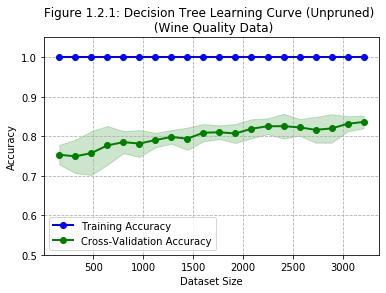

In [6]:
plot_learning_curve(dt_lc1_train_sizes, dt_lc1_train_scores, dt_lc1_validation_scores, 
                    "Figure 1.2.1: Decision Tree Learning Curve (Unpruned) \n (Wine Quality Data)")


In [7]:
print("Decision Tree: Tuning Hyper Param: Max Depth")
#randomize using GT ID
np.random.seed(gtid())
dtree_classifier = DecisionTreeClassifier()
dt_hp1_param_range = np.arange(1, 25) 
cv = KFold(n_splits = 5, shuffle = False)
dt_hp1_train_scores, dt_hp1_test_scores = validation_curve(dtree_classifier, X_train, Y_train, param_name = "max_depth", 
                                             param_range = dt_hp1_param_range, cv = cv, scoring = scorer, n_jobs=-1)

print("Decision Tree: Done tuning Hyper Param: Max Depth")


Decision Tree: Tuning Hyper Param: Max Depth
Decision Tree: Done tuning Hyper Param: Max Depth


Hyperparameter: Max Tree Depth 19
CV Accuracy:  0.8370845669845363


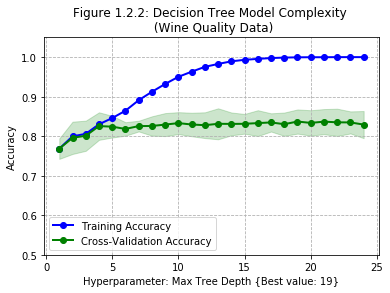

In [8]:
MAX_DEPTH = plot_validation_curve(dt_hp1_param_range, dt_hp1_train_scores, dt_hp1_test_scores, 
                      "Figure 1.2.2: Decision Tree Model Complexity \n (Wine Quality Data)", "Hyperparameter: Max Tree Depth")

In [9]:
print("Decision Tree: Tuning Hyper Param: min_samples_split")
#randomize using GT ID
np.random.seed(gtid())
dtree_classifier = DecisionTreeClassifier()
dt_hp2_param_range = np.arange(25,500, 25) 
cv = KFold(n_splits = 5, shuffle = False)
dt_hp2_train_scores, dt_hp2_test_scores = validation_curve(dtree_classifier, X_train, Y_train, param_name = "min_samples_split", 
                                             param_range = dt_hp2_param_range, cv = cv, scoring = scorer, n_jobs=-1)

print("Decision Tree: Done tuning Hyper Param: min_samples_split")

Decision Tree: Tuning Hyper Param: min_samples_split
Decision Tree: Done tuning Hyper Param: min_samples_split


Hyperparameter: Minimum Samples Split 200
CV Accuracy:  0.8293451763848804


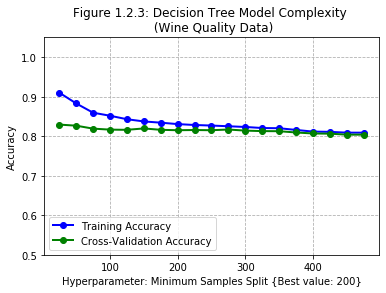

In [10]:
MIN_SAMPLES = plot_validation_curve2(dt_hp2_param_range, dt_hp2_train_scores, dt_hp2_test_scores, 
                      "Figure 1.2.3: Decision Tree Model Complexity \n (Wine Quality Data)", 
                      "Hyperparameter: Minimum Samples Split", visual = 200)

In [11]:
print("Create Learning Curve on Pruned Tree")
dtree_classifier = DecisionTreeClassifier(max_depth = MAX_DEPTH, min_samples_split = MIN_SAMPLES)
cv = KFold(n_splits = 5, shuffle = True)
train_sizes, train_scores, validation_scores = learning_curve(
    dtree_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = scorer, n_jobs=-1)
print("Done with learning curve")

Create Learning Curve on Pruned Tree
Done with learning curve


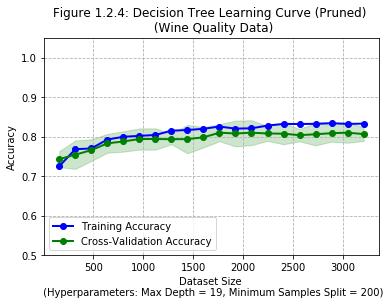

In [12]:
plot_learning_curve(train_sizes, train_scores, validation_scores, 
                    "Figure 1.2.4: Decision Tree Learning Curve (Pruned) \n (Wine Quality Data)", 
                   "Dataset Size \n (Hyperparameters: Max Depth = " + str(MAX_DEPTH) + ", Minimum Samples Split = " + str(MIN_SAMPLES) + ")")

In [13]:
#randomize using GT ID
np.random.seed(gtid())
clf = DecisionTreeClassifier(max_depth = MAX_DEPTH, min_samples_split = MIN_SAMPLES)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "Decision Tree")

Training Time (s)  :  0.0162
Prediction Time (s):  0.0005
------------------------------
Confusion Matrix: 
 [[675  81]
 [128 119]]
Accuracy  :  0.7916
Precision :  0.5950
Recall    :  0.4818
F1        :  0.5324
AUC       :  0.6873


### Classifier 2 : Neural Networks
Steps in the process:
* Create the learning curves using test data and cross-validation (assumed 5 hidden layers with 10 nodes each and a learning rate of 0.2)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [14]:
print("Neural Network: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
#nn_classifier = MLPClassifier(hidden_layer_sizes=(10,10,10,10,10), learning_rate_init = 0.1)
nn_classifier = MLPClassifier()
cv = KFold(n_splits = 5, shuffle = True)
nn_lc1_train_sizes, nn_lc1_train_scores, nn_lc1_validation_scores = learning_curve(
    nn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), 
    n_jobs=-1)
print("Neural Network: Done learning curve")

Neural Network: Create Learning Curves
Neural Network: Done learning curve


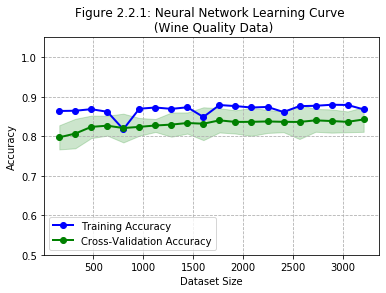

In [15]:
plot_learning_curve(nn_lc1_train_sizes, nn_lc1_train_scores, nn_lc1_validation_scores, 
                    "Figure 2.2.1: Neural Network Learning Curve \n (Wine Quality Data)")

In [16]:
print("Neural Network: Tuning Hyper Param: Hidden Layer Sizes")
#randomize using GT ID
np.random.seed(gtid())
nn_classifier = MLPClassifier()
nn_hp1_param_range = np.linspace(5,150,20).astype('int') 
cv = KFold(n_splits = 5, shuffle = False)
nn_hp1_train_scores, nn_hp1_test_scores = validation_curve(nn_classifier, X_train, Y_train, param_name = "hidden_layer_sizes", 
                                param_range = nn_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("Neural Network: Done tuning Hyper Param: Hidden Layer Sizes")

Neural Network: Tuning Hyper Param: Hidden Layer Sizes
Neural Network: Done tuning Hyper Param: Hidden Layer Sizes


Hyperparameter: Hidden Layer Size 12
CV Accuracy:  0.8453136820869174


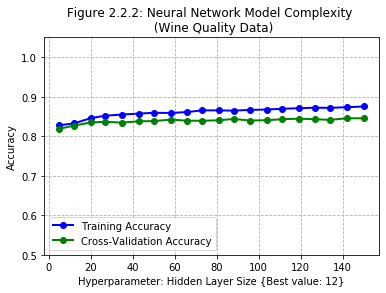

In [17]:
HIDDEN_LAYER_SIZE = plot_validation_curve2(nn_hp1_param_range, nn_hp1_train_scores, nn_hp1_test_scores, 
                    "Figure 2.2.2: Neural Network Model Complexity \n (Wine Quality Data)", "Hyperparameter: Hidden Layer Size")

In [18]:
print("Neural Network: Tuning Hyper Param: Learning Rate")
#randomize using GT ID
np.random.seed(gtid())
nn_classifier = MLPClassifier()
nn_hp2_param_range = np.arange(.05, .5, .05) 
cv = KFold(n_splits = 5, shuffle = False)
nn_hp2_train_scores, nn_hp2_test_scores = validation_curve(nn_classifier, X_train, Y_train, param_name = "learning_rate_init", 
                                param_range = nn_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("Neural Network: Done tuning Hyper Param: Learning Rate")

Neural Network: Tuning Hyper Param: Learning Rate
Neural Network: Done tuning Hyper Param: Learning Rate


Hyperparameter: Learning Rate 0.35
CV Accuracy:  0.8335886251910797


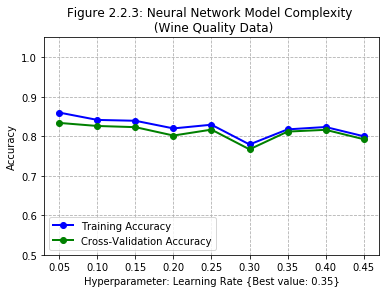

In [67]:
LEARNING_RATE = plot_validation_curve2(nn_hp2_param_range, nn_hp2_train_scores, nn_hp2_test_scores, 
                      "Figure 2.2.3: Neural Network Model Complexity \n (Wine Quality Data)", "Hyperparameter: Learning Rate")

In [20]:
print("Neural Network: Create Learning Curve on tuned classifier")
#randomize using GT ID
#HIDDEN_LAYER_SIZE = 5
#LEARNING_RATE = 0.35
np.random.seed(gtid())
nn_classifier = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(HIDDEN_LAYER_SIZE,), 
                              learning_rate_init = LEARNING_RATE)
cv = KFold(n_splits = 5, shuffle = True)
nn_lc2_train_sizes, nn_lc2_train_scores, nn_lc2_validation_scores = learning_curve(
    nn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("Neural Network: Done with learning curve")

Neural Network: Create Learning Curve on tuned classifier
Neural Network: Done with learning curve


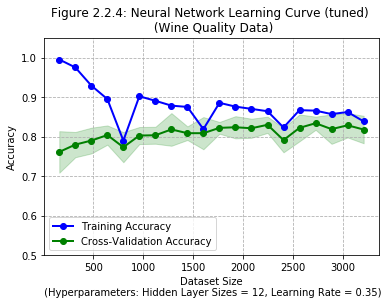

In [68]:
plot_learning_curve(nn_lc2_train_sizes, nn_lc2_train_scores, nn_lc2_validation_scores, 
                    "Figure 2.2.4: Neural Network Learning Curve (tuned) \n (Wine Quality Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: Hidden Layer Sizes = "+ str(HIDDEN_LAYER_SIZE) + 
                    ", Learning Rate = "+ str(LEARNING_RATE) + ")")

Training Time (s)  :  0.1958
Prediction Time (s):  0.0004
------------------------------
Confusion Matrix: 
 [[716  40]
 [136 111]]
Accuracy  :  0.8245
Precision :  0.7351
Recall    :  0.4494
F1        :  0.5578
AUC       :  0.6982


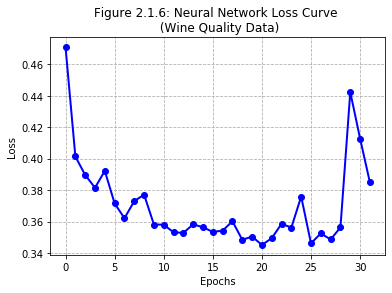

In [95]:
#randomize using GT ID
np.random.seed(gtid())
clf = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(HIDDEN_LAYER_SIZE,),
                    learning_rate_init = LEARNING_RATE)
evaluate_mlp_classifier(clf, X_train, Y_train, X_test, Y_test, "Neural Network")

### Classifier 3 : Boosting
Steps in the process:
* Create the learning curves using test data and cross-validation (assumed 5 hidden layers with 10 nodes each and a learning rate of 0.2)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [23]:
print("Boosting: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier()
cv = KFold(n_splits = 5, shuffle = True)
b_lc1_train_sizes, b_lc1_train_scores, b_lc1_validation_scores = learning_curve(
    boosting_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("Boosting: Done learning curve")

Boosting: Create Learning Curves
Boosting: Done learning curve


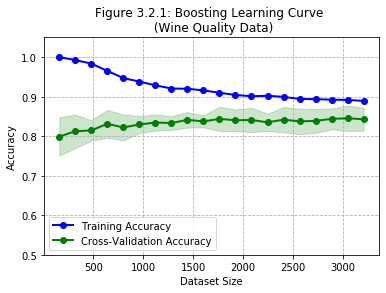

In [24]:
plot_learning_curve(b_lc1_train_sizes, b_lc1_train_scores, b_lc1_validation_scores, 
                    "Figure 3.2.1: Boosting Learning Curve \n (Wine Quality Data)")

In [25]:
print("Boosting: Tuning Hyper Param: Number of Estimators")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier()
b_hp1_param_range = np.arange(25,500,25) 
cv = KFold(n_splits = 5, shuffle = False)
b_hp1_train_scores, b_hp1_test_scores = validation_curve(boosting_classifier, X_train, Y_train, param_name = "n_estimators", 
                                             param_range = b_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("Boosting: Done tuning Hyper Param: Number of Estimators")

Boosting: Tuning Hyper Param: Number of Estimators
Boosting: Done tuning Hyper Param: Number of Estimators


Hyperparameter: Number of Estimators 25
CV Accuracy:  0.8662709642871599


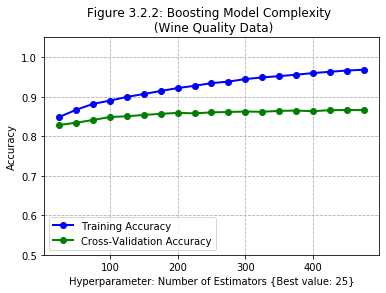

In [26]:
NO_ESTIMATORS = plot_validation_curve2(b_hp1_param_range, b_hp1_train_scores, b_hp1_test_scores, 
                      "Figure 3.2.2: Boosting Model Complexity \n (Wine Quality Data)", "Hyperparameter: Number of Estimators")

In [27]:
print("Boosting: Tuning Hyper Param: Min Samples Leaf")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier()
b_hp2_param_range = np.arange(50,500,50) 
cv = KFold(n_splits = 5, shuffle = False)
b_hp2_train_scores, b_hp2_test_scores = validation_curve(boosting_classifier, X_train, Y_train, param_name = "min_samples_leaf", 
                                             param_range = b_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("Boosting: Done tuning Hyper Param: Min Samples Leaf")

Boosting: Tuning Hyper Param: Min Samples Leaf
Boosting: Done tuning Hyper Param: Min Samples Leaf


Hyperparameter: Min Samples Leaf 450
CV Accuracy:  0.8455608793247842


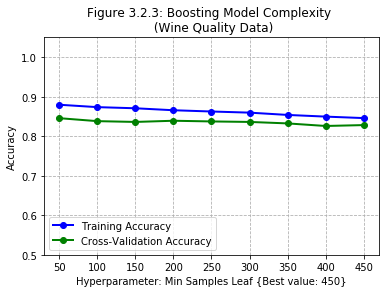

In [28]:
MIN_SAMPLES_LEAF = plot_validation_curve2(b_hp2_param_range, b_hp2_train_scores, b_hp2_test_scores, 
                      "Figure 3.2.3: Boosting Model Complexity \n (Wine Quality Data)", "Hyperparameter: Min Samples Leaf")

In [29]:
print("Boosting: Create Learning Curves (tuned)")
#randomize using GT ID
np.random.seed(gtid())
boosting_classifier = GradientBoostingClassifier(n_estimators = NO_ESTIMATORS, min_samples_leaf = MIN_SAMPLES_LEAF)
cv = KFold(n_splits = 5, shuffle = True)
b_lc2_train_sizes, b_lc2_train_scores, b_lc2_validation_scores = learning_curve(
    boosting_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("Boosting: Done learning curve")

Boosting: Create Learning Curves (tuned)
Boosting: Done learning curve


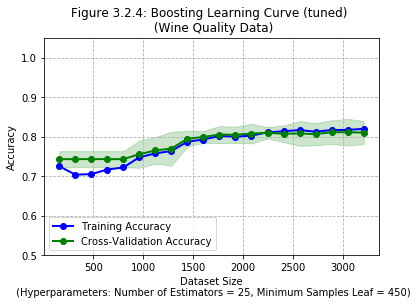

In [30]:
plot_learning_curve(b_lc2_train_sizes, b_lc2_train_scores, b_lc2_validation_scores, 
                    "Figure 3.2.4: Boosting Learning Curve (tuned) \n (Wine Quality Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: Number of Estimators = "+ str(NO_ESTIMATORS) + 
                    ", Minimum Samples Leaf = "+ str(MIN_SAMPLES_LEAF) + ")")

In [31]:
#randomize using GT ID
np.random.seed(gtid())
clf = GradientBoostingClassifier(n_estimators = NO_ESTIMATORS, min_samples_leaf = MIN_SAMPLES_LEAF)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "Boosting")

Training Time (s)  :  0.0715
Prediction Time (s):  0.0008
------------------------------
Confusion Matrix: 
 [[689  67]
 [133 114]]
Accuracy  :  0.8006
Precision :  0.6298
Recall    :  0.4615
F1        :  0.5327
AUC       :  0.6865


### Classifier 4 : Support Vector Machines
Steps in the process:
* Create the learning curves using test data and cross-validation (assumed 5 hidden layers with 10 nodes each and a learning rate of 0.2)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

## Kernel: Poly

In [32]:
print("SVM: Create Learning Curves: Poly")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "poly")
cv = KFold(n_splits = 5, shuffle = True)
svm_lc1_train_sizes, svm_lc1_train_scores, svm_lc1_validation_scores = learning_curve(svm_classifier, X_train, Y_train, 
                        train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("SVM: Done learning curve")

SVM: Create Learning Curves: Poly
SVM: Done learning curve


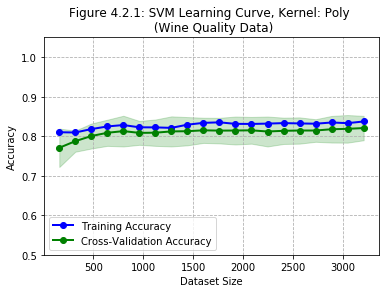

In [33]:
plot_learning_curve(svm_lc1_train_sizes, svm_lc1_train_scores, 
                    svm_lc1_validation_scores, "Figure 4.2.1: SVM Learning Curve, Kernel: Poly \n (Wine Quality Data)")

In [34]:
print("SVM: Tuning Hyper Param: C")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "poly")
# svm_hp1_param_range = np.arange(1,50,5) 
#svm_hp1_param_range = np.logspace(-2, 10, 13)
svm_hp1_param_range = np.logspace(-7, 2, 10)
cv = KFold(n_splits = 5, shuffle = False)
svm_hp1_train_scores, svm_hp1_test_scores = validation_curve(svm_classifier, X_train, Y_train, param_name = "C", 
                            param_range = svm_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("SVM: Done tuning Hyper Param: C")

SVM: Tuning Hyper Param: C
SVM: Done tuning Hyper Param: C


Hyperparameter: C 0.1
CV Accuracy:  0.7724608578429083


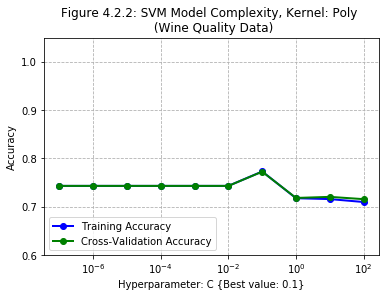

In [70]:
C_VALUE = plot_validation_curve3(svm_hp1_param_range, svm_hp1_train_scores, svm_hp1_test_scores, 
                      "Figure 4.2.2: SVM Model Complexity, Kernel: Poly \n (Wine Quality Data)", "Hyperparameter: C")

In [36]:
print("SVM: Tuning Hyper Param: Coef0")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "poly")
svm_hp2_param_range = np.linspace(0.0, 2.0, 10) 
cv = KFold(n_splits = 5, shuffle = False)
svm_hp2_train_scores, svm_hp2_test_scores = validation_curve(svm_classifier, X_train, Y_train, param_name = "coef0", 
                                param_range = svm_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("SVM: Done tuning Hyper Param: Coef0")

SVM: Tuning Hyper Param: Coef0
SVM: Done tuning Hyper Param: Coef0


Hyperparameter: Coef0 1.78
CV Accuracy:  0.8420708528304706


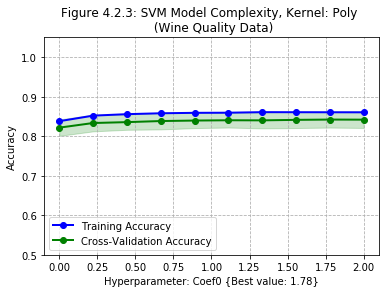

In [37]:
COEF_VALUE = plot_validation_curve4(svm_hp2_param_range, svm_hp2_train_scores, svm_hp2_test_scores, 
                      "Figure 4.2.3: SVM Model Complexity, Kernel: Poly \n (Wine Quality Data)", "Hyperparameter: Coef0")

In [72]:
print("SVM: Create Learning Curves (tuned)")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "poly", C = C_VALUE, coef0 = COEF_VALUE, gamma = 'auto')
cv = KFold(n_splits = 5, shuffle = True)
svm_lc2_train_sizes, svm_lc2_train_scores, svm_lc2_validation_scores = learning_curve(svm_classifier, X_train, Y_train, 
                        train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("SVM: Done learning curve")

SVM: Create Learning Curves (tuned)
SVM: Done learning curve


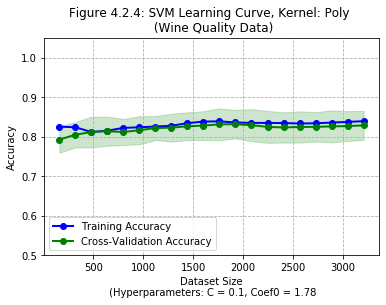

In [73]:
plot_learning_curve(svm_lc2_train_sizes, svm_lc2_train_scores, svm_lc2_validation_scores, 
                    "Figure 4.2.4: SVM Learning Curve, Kernel: Poly \n (Wine Quality Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: C = "+ str(C_VALUE) + ", Coef0 = "+\
                    str(round(COEF_VALUE,2)))

In [74]:
#randomize using GT ID
np.random.seed(gtid())
clf = SVC(C = C_VALUE, kernel = "poly", coef0 = COEF_VALUE, gamma = 'auto')
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "SVM")

Training Time (s)  :  0.1953
Prediction Time (s):  0.0205
------------------------------
Confusion Matrix: 
 [[694  62]
 [115 132]]
Accuracy  :  0.8235
Precision :  0.6804
Recall    :  0.5344
F1        :  0.5986
AUC       :  0.7262


## Kernel: Sigmoid

In [41]:
print("SVM: Create Learning Curves: Sigmoid")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "sigmoid")
cv = KFold(n_splits = 5, shuffle = True)
svm_lc1_train_sizes, svm_lc1_train_scores, svm_lc1_validation_scores = learning_curve(svm_classifier, X_train, Y_train, 
                        train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("SVM: Done learning curve")

SVM: Create Learning Curves: Sigmoid
SVM: Done learning curve


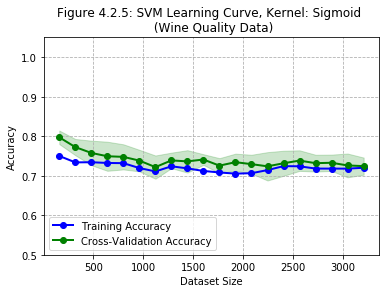

In [42]:
plot_learning_curve(svm_lc1_train_sizes, svm_lc1_train_scores, 
                    svm_lc1_validation_scores, "Figure 4.2.5: SVM Learning Curve, Kernel: Sigmoid \n (Wine Quality Data)")

In [43]:
print("SVM: Tuning Hyper Param: C")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "sigmoid")
# svm_hp1_param_range = np.arange(1,50,5) 
#svm_hp1_param_range = np.logspace(-2, 10, 13)
svm_hp1_param_range = np.logspace(-7, 2, 10)
cv = KFold(n_splits = 5, shuffle = False)
svm_hp1_train_scores, svm_hp1_test_scores = validation_curve(svm_classifier, X_train, Y_train, param_name = "C", 
                            param_range = svm_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("SVM: Done tuning Hyper Param: C")

SVM: Tuning Hyper Param: C
SVM: Done tuning Hyper Param: C


Hyperparameter: C 0.1
CV Accuracy:  0.7724608578429083


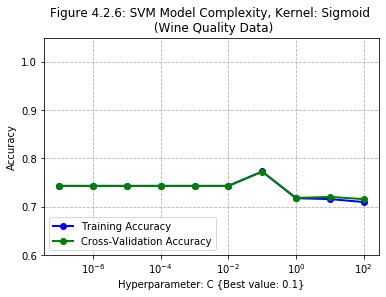

In [75]:
C_VALUE_SIGMOID = plot_validation_curve3(svm_hp1_param_range, svm_hp1_train_scores, svm_hp1_test_scores, 
                      "Figure 4.2.6: SVM Model Complexity, Kernel: Sigmoid \n (Wine Quality Data)", "Hyperparameter: C")

In [45]:
print("SVM: Tuning Hyper Param: Coef0")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "sigmoid")
svm_hp2_param_range = np.linspace(0.0, 2.0, 10) 
cv = KFold(n_splits = 5, shuffle = False)
svm_hp2_train_scores, svm_hp2_test_scores = validation_curve(svm_classifier, X_train, Y_train, param_name = "coef0", 
                                param_range = svm_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("SVM: Done tuning Hyper Param: Coef0")

SVM: Tuning Hyper Param: Coef0
SVM: Done tuning Hyper Param: Coef0


Hyperparameter: Coef0 0.67
CV Accuracy:  0.7377719870112485


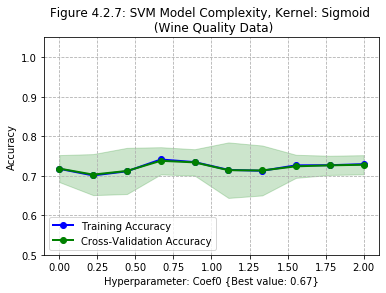

In [46]:
COEF_VALUE_SIGMOID = plot_validation_curve4(svm_hp2_param_range, svm_hp2_train_scores, svm_hp2_test_scores, 
                      "Figure 4.2.7: SVM Model Complexity, Kernel: Sigmoid \n (Wine Quality Data)", "Hyperparameter: Coef0")

In [47]:
print("SVM: Create Learning Curves (tuned)")
#randomize using GT ID
np.random.seed(gtid())
svm_classifier = SVC(kernel = "sigmoid", C = C_VALUE_SIGMOID, gamma = "auto", coef0 = COEF_VALUE_SIGMOID)
cv = KFold(n_splits = 5, shuffle = True)
svm_lc2_train_sizes, svm_lc2_train_scores, svm_lc2_validation_scores = learning_curve(svm_classifier, X_train, Y_train, 
                        train_sizes = np.linspace(0.05, 1.0, 20), cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("SVM: Done learning curve")

SVM: Create Learning Curves (tuned)
SVM: Done learning curve


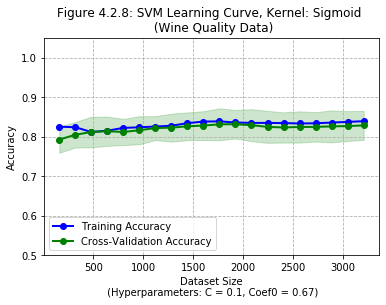

In [76]:
plot_learning_curve(svm_lc2_train_sizes, svm_lc2_train_scores, svm_lc2_validation_scores, 
                    "Figure 4.2.8: SVM Learning Curve, Kernel: Sigmoid \n (Wine Quality Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: C = "+ str(C_VALUE_SIGMOID) + 
                    ", Coef0 = "+ str(round(COEF_VALUE_SIGMOID,2)) + ")")

In [49]:
#randomize using GT ID
np.random.seed(gtid())
clf = SVC(C = C_VALUE_SIGMOID, kernel = "sigmoid", gamma = "auto", coef0 = COEF_VALUE_SIGMOID)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "SVM")

Training Time (s)  :  0.3127
Prediction Time (s):  0.0519
------------------------------
Confusion Matrix: 
 [[631 125]
 [130 117]]
Accuracy  :  0.7458
Precision :  0.4835
Recall    :  0.4737
F1        :  0.4785
AUC       :  0.6542


### Classifier 5 : K Nearest Neighbors
Steps in the process:
* Create the learning curves using test data and cross-validation (default values of kNN)
* Create Validation curves on 2 hyper parameters to find the best hyper parameter value
* Recreate the Learning Curve with the correct values of the hyper parameters
* After tuning the classifier using the two found hyper-parameters, use the classifier to predict the results and collect metrics 

In [50]:
print("kNN: Create Learning Curves")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier()
cv = KFold(n_splits = 5, shuffle = True)
knn_lc1_train_sizes, knn_lc1_train_scores, knn_lc1_validation_scores = learning_curve(
    knn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("kNN: Done learning curve")

kNN: Create Learning Curves
kNN: Done learning curve


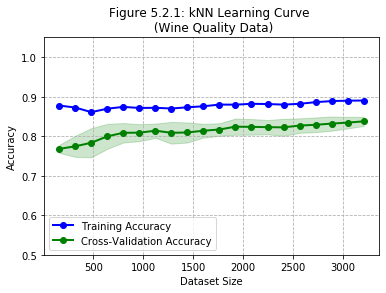

In [51]:
plot_learning_curve(knn_lc1_train_sizes, knn_lc1_train_scores, knn_lc1_validation_scores, 
                    "Figure 5.2.1: kNN Learning Curve \n (Wine Quality Data)")

In [52]:
print("kNN: Tuning Hyper Param: No of Neighbors")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier()
knn_hp1_param_range = np.arange(5,50,3) 
cv = KFold(n_splits = 5, shuffle = False)
knn_hp1_train_scores, knn_hp1_test_scores = validation_curve(knn_classifier, X_train, Y_train, param_name = "n_neighbors", 
                                param_range = knn_hp1_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("kNN: Done tuning Hyper Param: No of Neighbors")

kNN: Tuning Hyper Param: No of Neighbors
kNN: Done tuning Hyper Param: No of Neighbors


Hyperparameter: Number of Neighbors 29
CV Accuracy:  0.837578027465668


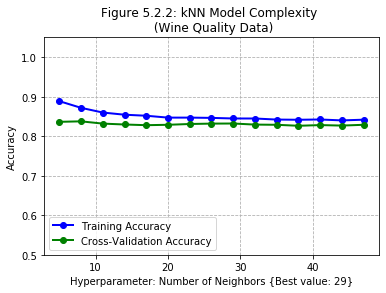

In [53]:
NO_NEIGHBORS = plot_validation_curve2(knn_hp1_param_range, knn_hp1_train_scores, knn_hp1_test_scores, 
                      "Figure 5.2.2: kNN Model Complexity \n (Wine Quality Data)", "Hyperparameter: Number of Neighbors")

In [82]:
print("kNN: Tuning Hyper Param: Leaf Size")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier()
knn_hp2_param_range = np.arange(10,100,10) 
cv = KFold(n_splits = 5, shuffle = False)
knn_hp2_train_scores, knn_hp2_test_scores = validation_curve(knn_classifier, X_train, Y_train, param_name = "leaf_size", 
                                param_range = knn_hp2_param_range, cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)

print("kNN: Done tuning Hyper Param: Leaf Size")

kNN: Tuning Hyper Param: Leaf Size
kNN: Done tuning Hyper Param: Leaf Size


Hyperparameter: Leaf Size 10
CV Accuracy:  0.836329899346515


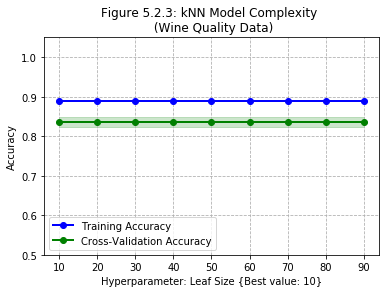

In [83]:
LEAF_SIZE = plot_validation_curve(knn_hp2_param_range, knn_hp2_train_scores, knn_hp2_test_scores, 
                      "Figure 5.2.3: kNN Model Complexity \n (Wine Quality Data)", "Hyperparameter: Leaf Size")

In [84]:
print("kNN: Create Learning Curves on tuned model")
#randomize using GT ID
np.random.seed(gtid())
knn_classifier = KNeighborsClassifier(n_neighbors = NO_NEIGHBORS, leaf_size = LEAF_SIZE)
#knn_classifier = KNeighborsClassifier(n_neighbors = NO_NEIGHBORS)
cv = KFold(n_splits = 5, shuffle = True)
train_sizes, train_scores, validation_scores = learning_curve(
    knn_classifier, X_train, Y_train, train_sizes = np.linspace(0.05, 1.0, 20), 
    cv = cv, scoring = make_scorer(accuracy_score), n_jobs=-1)
print("kNN: Done learning curve on tuned model")

kNN: Create Learning Curves on tuned model
kNN: Done learning curve on tuned model


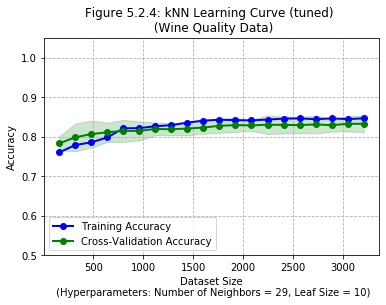

In [85]:
plot_learning_curve(train_sizes, train_scores, validation_scores, 
                    "Figure 5.2.4: kNN Learning Curve (tuned) \n (Wine Quality Data)",
                   xlabel = "Dataset Size\n (Hyperparameters: Number of Neighbors = "+ 
                    str(NO_NEIGHBORS) + ", Leaf Size = "+ str(LEAF_SIZE) +")")

In [86]:
#randomize using GT ID
np.random.seed(gtid())
clf = KNeighborsClassifier(n_neighbors = NO_NEIGHBORS, leaf_size = LEAF_SIZE)
evaluate_tuned_classifier(clf, X_train, Y_train, X_test, Y_test, "kNN")

Training Time (s)  :  0.0039
Prediction Time (s):  0.1279
------------------------------
Confusion Matrix: 
 [[671  85]
 [ 98 149]]
Accuracy  :  0.8175
Precision :  0.6368
Recall    :  0.6032
F1        :  0.6195
AUC       :  0.7454


## 4. Conclusion

Finally we will evaluate the training times across the different classifiers for increasing training sizes

In [59]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate

def get_cross_validate_scores(classifier, X, Y, title = "Title"):
    data_size = len(Y)
    training_sizes = np.arange(0.05, 1.01, 0.05)
    
    i = 0
    
    train_times=np.zeros(20)
    train_scores=np.zeros(20)
    cv_times=np.zeros(20)
    cv_scores=np.zeros(20)
    train_sizes = np.zeros(20)

    for sub in training_sizes:
        mask = np.random.rand(len(X)) < sub
        X_train = X[mask]
        Y_train = Y[mask]
        train_sizes[i] = len(X_train)
        #print("start cross validation")
        scores = cross_validate(classifier, X_train, Y_train, cv = 5, scoring = make_scorer(accuracy_score), return_train_score = True, n_jobs = -1)
        train_times[i] = np.mean(scores['fit_time'])
        train_scores[i] = np.mean(scores['train_score'])
        cv_times[i] = np.mean(scores['score_time'])
        cv_scores[i] = np.mean(scores['test_score'])
        i = i + 1
    return train_times, train_scores, cv_times, cv_scores, train_sizes

def plot_comparison_curves(train_sizes, clf1, clf2, clf3, clf4, clf5, clf6, title, xlabel, ylabel):
    lw = 2
    #print(train_sizes)
    labels=["Decision Tree", "Neural Network", "Boosting", "SVM - Poly", "SVM - Sigmoid", "kNN"]
    plt.plot(train_sizes, clf1, 'o-', color="b",label=labels[0],  lw=lw)
    plt.plot(train_sizes, clf2, 'o-', color="g",label=labels[1],  lw=lw)
    plt.plot(train_sizes, clf3, 'o-', color="r",label=labels[2],  lw=lw)
    plt.plot(train_sizes, clf4, 'o-', color="c",label=labels[3],  lw=lw)
    plt.plot(train_sizes, clf5, 'o-', color="m",label=labels[4],  lw=lw)
    plt.plot(train_sizes, clf6, 'o-', color="0.5",label=labels[5],  lw=lw)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc="best")
    plt.grid(True, linestyle = "--")
    plt.show()  

In [60]:
#randomize using GT ID
np.random.seed(gtid())
clf1 = DecisionTreeClassifier(max_depth = MAX_DEPTH, min_samples_split = MIN_SAMPLES)
np.random.seed(gtid())
clf2 = MLPClassifier(solver='adam',activation='logistic', 
                     hidden_layer_sizes=(HIDDEN_LAYER_SIZE,), learning_rate_init = LEARNING_RATE)
np.random.seed(gtid())
clf3 = GradientBoostingClassifier(n_estimators = NO_ESTIMATORS, min_samples_leaf = MIN_SAMPLES_LEAF)
np.random.seed(gtid())
clf4 = SVC(C = C_VALUE, kernel = "poly", gamma = 'auto', coef0 = COEF_VALUE)
np.random.seed(gtid())
clf5 = SVC(C = C_VALUE_SIGMOID, kernel = "sigmoid", gamma = 'auto', coef0 = COEF_VALUE_SIGMOID)
np.random.seed(gtid())
clf6 = KNeighborsClassifier(n_neighbors = NO_NEIGHBORS, leaf_size = LEAF_SIZE)

In [61]:
print("Classifier 1 time: Start")
clf1_train_times, clf1_train_scores, clf1_cv_times, clf1_cv_scores, clf1_train_sizes = get_cross_validate_scores(clf1, X_train, Y_train)
print("Classifier 1 time: End")

print("Classifier 2 time: Start")
clf2_train_times, clf2_train_scores, clf2_cv_times, clf2_cv_scores, clf2_train_sizes = get_cross_validate_scores(clf2, X_train, Y_train)
print("Classifier 2 time: End")

print("Classifier 3 time: Start")
clf3_train_times, clf3_train_scores, clf3_cv_times, clf3_cv_scores, clf3_train_sizes = get_cross_validate_scores(clf3, X_train, Y_train)
print("Classifier 3 time: End")

print("Classifier 4 time: Start")
clf4_train_times, clf4_train_scores, clf4_cv_times, clf4_cv_scores, clf4_train_sizes = get_cross_validate_scores(clf4, X_train, Y_train)
print("Classifier 4 time: End")

print("Classifier 5 time: Start")
clf5_train_times, clf5_train_scores, clf5_cv_times, clf5_cv_scores, clf5_train_sizes = get_cross_validate_scores(clf5, X_train, Y_train)
print("Classifier 5 time: End")

print("Classifier 6 time: Start")
clf6_train_times, clf6_train_scores, clf6_cv_times, clf6_cv_scores, clf6_train_sizes = get_cross_validate_scores(clf6, X_train, Y_train)
print("Classifier 6 time: End")

Classifier 1 time: Start
Classifier 1 time: End
Classifier 2 time: Start
Classifier 2 time: End
Classifier 3 time: Start
Classifier 3 time: End
Classifier 4 time: Start
Classifier 4 time: End
Classifier 5 time: Start
Classifier 5 time: End
Classifier 6 time: Start
Classifier 6 time: End


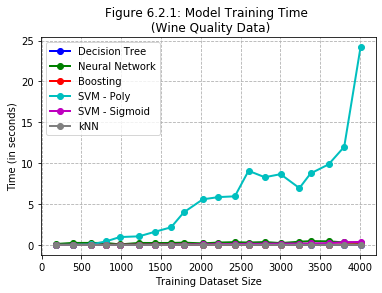

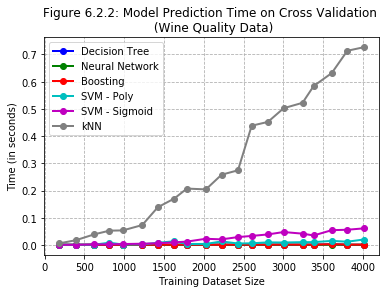

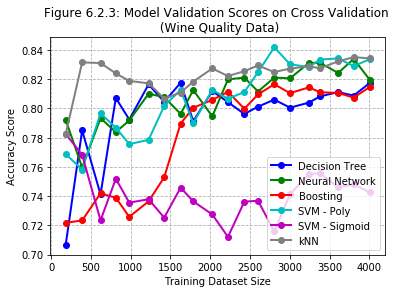

In [62]:
#plot curves
plot_comparison_curves(clf1_train_sizes, clf1_train_times, clf2_train_times, clf3_train_times, clf4_train_times, 
                       clf5_train_times, clf6_train_times, "Figure 6.2.1: Model Training Time \n (Wine Quality Data)", "Training Dataset Size", "Time (in seconds)")

plot_comparison_curves(clf1_train_sizes, clf1_cv_times, clf2_cv_times, clf3_cv_times, clf4_cv_times, 
                       clf5_cv_times, clf6_cv_times, "Figure 6.2.2: Model Prediction Time on Cross Validation \n (Wine Quality Data)", "Training Dataset Size", "Time (in seconds)")

plot_comparison_curves(clf1_train_sizes, clf1_cv_scores, clf2_cv_scores, clf3_cv_scores, clf4_cv_scores, 
                       clf5_cv_scores, clf6_cv_scores, "Figure 6.2.3: Model Validation Scores on Cross Validation \n (Wine Quality Data)", "Training Dataset Size", "Accuracy Score")

## Cleaning up
In this section I will create another chart which will track the training time per epoch for Artificial Neural Network

In [63]:
param_range = np.arange(50, 1001, 50)
i = 0
train_times=np.zeros(20)
for sub in param_range:
    print("Iteration: ", i, " Size: ", sub)
    np.random.seed(gtid())
    clf = MLPClassifier(solver='adam',activation='logistic', hidden_layer_sizes=(HIDDEN_LAYER_SIZE,), 
                              learning_rate_init = LEARNING_RATE, max_iter = sub)
    scores = cross_validate(clf, X_train, Y_train, cv = 5, scoring = make_scorer(f1_score), return_train_score = True, n_jobs = 4)
    train_times[i] = np.mean(scores['fit_time'])
    i = i + 1


Iteration:  0  Size:  50
Iteration:  1  Size:  100
Iteration:  2  Size:  150
Iteration:  3  Size:  200
Iteration:  4  Size:  250
Iteration:  5  Size:  300
Iteration:  6  Size:  350
Iteration:  7  Size:  400
Iteration:  8  Size:  450
Iteration:  9  Size:  500
Iteration:  10  Size:  550
Iteration:  11  Size:  600
Iteration:  12  Size:  650
Iteration:  13  Size:  700
Iteration:  14  Size:  750
Iteration:  15  Size:  800
Iteration:  16  Size:  850
Iteration:  17  Size:  900
Iteration:  18  Size:  950
Iteration:  19  Size:  1000


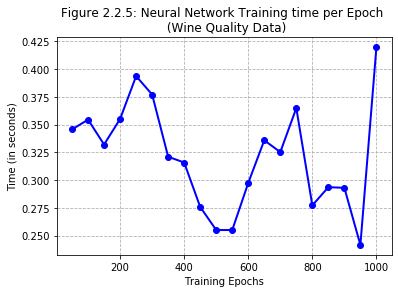

In [64]:
#plot chart
lw = 2
#print(train_sizes)
labels=["Decision Tree", "Neural Network", "Boosting", "SVM", "kNN"]
plt.plot(param_range, train_times, 'o-', color="b",  lw=lw)

plt.title("Figure 2.2.5: Neural Network Training time per Epoch \n (Wine Quality Data)")
plt.xlabel("Training Epochs")
plt.ylabel("Time (in seconds)")
#plt.legend(loc="best")
plt.grid(True, linestyle = "--")
plt.show()  